# Practica 1

### Maestria en Computo aplicado
#### *Topicos de la industria I*

**Nombre:**  Efren Del Real Frias  
**e-mail:**  efren.delreal8824@alumnos.udg.mx

**Fecha** Marzo 26 del 2022

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

from google.colab import files

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Ejemplo Brownian Motion 1D

In [3]:
# Init parameters
s_pos = 0
n_steps = 1000

# Warning about the small number of steps
if n_steps < 30:
    print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

# Init Brownian Walk vector
bw = np.ones(n_steps)*s_pos

# Generate trajectory
for i in range(1, n_steps):
    # Sampling from a uniform distribution
    di = np.random.choice([1,-1])
    # Wiener process
    bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

## Actividad 1: Brownian Motion 1D - N Trayectoria

* Guardar trayectoria en Numpy array
* Visualizar con *matplotlib*

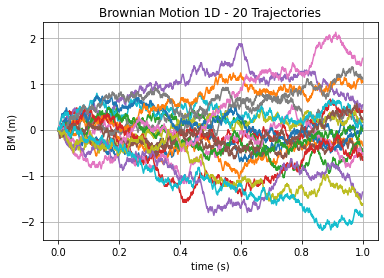

In [4]:

n_samples1:     int  = 1000
n_trajectory1:  int  = 20

try:
  assert(n_samples1 > 0),     '[Error] n_samples1 must be greater than 0.'
  assert(n_trajectory1 > 0),  '[Error] n_trajectory1 must be greater than 0.'

  #  Init Brownian Motion position (zeros)
  BM1_Init = np.zeros(shape=(1, n_trajectory1))
  
  # Calculates random movement
  BM1 = np.random.choice([1, -1], size=((n_samples1 - 1), n_trajectory1) ) * ( 1 / np.sqrt(n_samples1) )

  # Finally, Gets Bownian Motion trajectory incrementing the previous movement 
  #          with the current one.
  BM1 = np.cumsum(np.concatenate((BM1_Init, BM1), axis=0), axis=0)

except AssertionError as errMsg:
  print(errMsg)
else:

  # time axis - need to display Brownian Motion in 1D
  Time1 = np.linspace(0, 1, n_samples1)

  # Display Brownian Motion trajectories!!!
  fig, ax = plt.subplots()
  ax.plot(Time1, BM1)
  ax.set(xlabel='time (s)', ylabel='BM (m)',
       title=f'Brownian Motion 1D - {n_trajectory1} Trajectories')
  ax.grid()
  
  plt.show()
finally:
  pass

## Actividad 2: Brownian Motion 2D - 1 Trayectoria

* Movimientos: Norte, Sur, Este, Oeste
* Guardar trayectoria en Numpy array
* Visualizar con *matplotlib* - Proyeccion en 2D
* Visualizar con *matplotlib* - Proyeccion en 3D

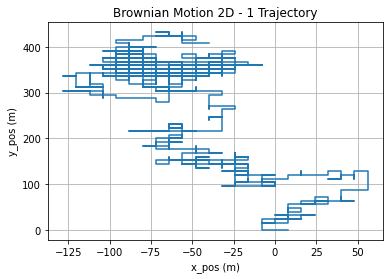

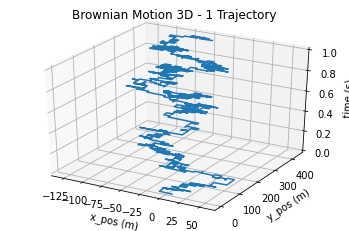

In [5]:
speed2:     int = 8
n_samples2: int = 1000


try:
  assert(n_samples2 > 0), '[Error] n_samples2 must be greater than 0.'

  # Define Brownian Motion bidimensional array.
  BM2_2d = np.zeros(shape=(n_samples2, 2))

  # Init first Brownian Motion posiotion.
  # Note: Since Brownian Motion movements shall be [North, South, East, West]
  #       one of the vectors points (x, y) must be initialized to zero. 
  BM2_2d[0, :] = np.array([speed2, 0])

  # Iterate over missing samples from the Brownian Motion
  for i in range(1, n_samples2):

    # Gets a random direction (0, 90, 180, 270 degrees)
    theta = np.random.choice( [0.0, (np.pi / 2.0), np.pi, (3.0 * np.pi) / 2.0] )

    # Calculates a trigonometric rotation matrix.
    mRotation = np.array([
                          [np.cos(theta), -np.sin(theta)], 
                          [np.sin(theta),  np.cos(theta)] ])

    # Rotates previous position from new theta direction.
    BM2_2d[i, :] =  BM2_2d[i - 1, :].dot(mRotation)

  # Gets Brownian motion trajectory accumulating previous position 
  # to the current one and so on.
  BM2_2d = np.cumsum(BM2_2d, axis=0)

except AssertionError as errMsg:
  print(errMsg)
else:
  # Display Browninan Motion trajectory !!!!
  ## 2D representation
  fig, ax = plt.subplots(1,1)
  ax.plot(BM2_2d[:,0], BM2_2d[:,1])
  ax.set(xlabel='x_pos (m)', ylabel='y_pos (m)',
       title= 'Brownian Motion 2D - 1 Trajectory')
  ax.grid()
  plt.show()

  ## 3D representation
  Time2 = np.linspace(0, 1, n_samples2)
  ax = plt.axes(projection='3d')
  ax.plot( BM2_2d[:,0], BM2_2d[:,1], Time2 )
  ax.set(xlabel='x_pos (m)', ylabel='y_pos (m)', zlabel='time (s)',
       title= 'Brownian Motion 3D - 1 Trajectory')
  plt.show()

finally:
  pass

## Actividad 3: Correlated Random Walk - 1 Trayectoria

* Utilizar vectores
* Guardar trayectoria en Numpy array
* Visualizar con **plotly**

## 3.1 References
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wrapcauchy.html

## 3.2 Implementation

In [8]:
# Init params
CRW3_exponent:float  = 0.6      # 0 < c < 1, dominio abierto. No debe tocar 0 o 1
speed3:         int = 6
n_samples3:     int = 1000

try:

  assert((0.0 < CRW3_exponent) and  (1.0 > CRW3_exponent) ), '[Error] Value out of range. 0.0 < CRW3_exponent < 1.0'

  # Vector Init
  vVelocity3 = Vec2d(speed3, 0)

  # Correlated Random Walk bidimentional array definition
  CRW3_2d = np.zeros(shape=(n_samples3, 2))

  for i in range (1, n_samples3):

    # Gets random direction from wrapcauchy probability. 
    # Wrapcauchy domain is defined: 0 <= x <= 2pi
    theta = wrapcauchy.rvs(CRW3_exponent)

    # Turns current position
    vVelocity3 = vVelocity3.rotated(theta)

    # Acomulates current position
    CRW3_2d[i][0] = CRW3_2d[i - 1][0] + vVelocity3.x
    CRW3_2d[i][1] = CRW3_2d[i - 1][1] + vVelocity3.y


except AssertionError as errMsg:
  print(errMsg)
else:
  # Init figure
  fig3 = go.Figure()

  fig3.add_trace(go.Scatter(
      x=CRW3_2d[:,0],
      y=CRW3_2d[:,1],
      marker=dict(size=2),
      line = dict(color='red', width=2),
      mode = 'lines',
      name = 'Correlated Random Walk',
      showlegend = True
  ))

  fig3.show()
  

## Actividad 4: Levy Walk - 1 Trayectoria

* Utilizar vectores
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar con **plotly**

### 4.1 References
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_estable

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html?highlight=levy#scipy.stats.levy_stable

### 4.2 Implementation

In [10]:
# Init params
alpha4:         float = 1.2   # 0 < a < 2
beta4:          float = 0.0   # inclination

speed4:           int = 1
n_samples4:       int = 1000
stdMotionSteps4:  int = 3

initPos4              = {'x': 2.0, 'y':1.0}

try:

  assert( (0 < alpha4) and (2 >= alpha4)), '[Error] Value out of range. 0 < alpha4 <= 2'

  # Init vector
  vVelocity4 = Vec2d(speed4, 0)

  # Define and initialize first position of Levy Walk DataFrame
  LW4_2d_df = pd.DataFrame([{'x_pos': initPos4['x'], 'y_pos': initPos4['y']}])


  for i in range (1, n_samples4):
    # Gets random Levy's step size from probability density function.
    step_size = levy_stable.rvs(alpha= alpha4, beta=beta4, loc=stdMotionSteps4)

    # round to integer number
    step_size = np.floor(step_size)

    # Gets a random direction
    theta = np.random.uniform(-np.pi, np.pi)
    
    # Turns vector's position to the new direction
    vVelocity4 = vVelocity4.rotated(theta)
      
     # Move n steps in the same direction then acumulate current position
     # to the previous one.  
    temp_df = pd.DataFrame([{
        'x_pos': LW4_2d_df.x_pos[i - 1] + (vVelocity4.x * step_size) ,
        'y_pos': LW4_2d_df.y_pos[i - 1] + (vVelocity4.y * step_size)}])
    
    # Add to the end accumulated Levy's positions.
    LW4_2d_df = pd.concat([LW4_2d_df, temp_df], ignore_index=True)

except AssertionError as errMsg:
  print(errMsg)
else:
  # Init figure
  fig4_3d = go.Figure()

  fig4_3d.add_trace(
      go.Scatter3d(
          x = LW4_2d_df.x_pos,
          y = LW4_2d_df.y_pos,
          z = LW4_2d_df.index,
          marker = dict(size=2),
          line = dict(color='red', width=4),
          mode = 'lines',
          name = f'alpha:{alpha4}, beta:{beta4}',
          showlegend = True ) )
  
  # Figure parameters
  fig4_3d.update_layout( 
      title_text ='Levy Flight trajectory in 3D',
      autosize=False,
      width=800,
      height=800,
      scene_camera=dict(
          up=dict(x=0, y=1,z=0),
          center=dict(x=0, y=0, z=0),
          eye=dict(x=0, y=0, z=1)
          ),
          scene=dict(
              xaxis=dict( title='x_pos (m)'),
              yaxis=dict( title='y_pos (m)'),
              zaxis=dict( title='time (s)', nticks = 20)
              ) )
  fig4_3d.show()

## Actividad 5: Correlated Random Walk - N Trayectorias

* Utilizar vectores
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar con **plotly**
* Exportar trayectorias como *pkl*

In [11]:
# Init params
n_trajectory5:  int = 4
speed5:         int = 3
resolution5:    int = 1000
initPos5            = {'x':0.0, 'y':0.0}
pkl_files:     bool = False        # Generate pkl files from DataFrame trajectory

# Init figure
fig5_3d = go.Figure()

try:
  assert( (0 < n_trajectory5) and (5 >= n_trajectory5) ), '[Error] Value out of range. 0 < n_trajectory5 <= 5'

  # Create a list of n random c exponent
  # Domain of c shall be:  0 < c < 1
  CRW_exponent = [np.round(np.random.uniform(0.1, 0.9), 2)
                   for _ in range(n_trajectory5)]
  
  for iCRW_c in CRW_exponent:
    vVelocity5 = Vec2d(speed5, 0)
    
    CRW5_2d_df = pd.DataFrame([{'x_pos': initPos5['x'], 'y_pos':initPos5['y']}])
    
    for i in range (1, resolution5):

      # Gets random direction from wrapcauchy probability. 
      # Wrapcauchy domain is defined: 0 <= x <= 2pi
      theta = wrapcauchy.rvs(iCRW_c)

      # Turns current position
      vVelocity5 = vVelocity5.rotated(theta)

      # Acomulates current position
      temp_df = pd.DataFrame([{
          'x_pos': CRW5_2d_df.x_pos[i - 1] + vVelocity5.x,
          'y_pos': CRW5_2d_df.y_pos[i - 1] + vVelocity5.y }])
      
      # Correlated Random Walk trajectory!!!!
      CRW5_2d_df =pd.concat([CRW5_2d_df, temp_df], ignore_index=True)
      
    # Adds a new trajectory to the figure
    fig5_3d.add_trace(
        go.Scatter3d(
            x = CRW5_2d_df.x_pos,
            y = CRW5_2d_df.y_pos,
            z = CRW5_2d_df.index,
            marker = dict(size=2),
            line = dict(width=4),
            mode = 'lines',
            name = f'cauchy {iCRW_c}',
            showlegend = True ) )

    # Convert padas DataFrame to pkl file, then download to the host
    if (pkl_files):
      pklFile_name: str = 'CRW_c_{}_df.pkl'.format(str(iCRW_c).replace('.','_'))
      CRW5_2d_df.to_pickle(f'./{pklFile_name}')
      files.download(pklFile_name)

except AssertionError as errMsg:
    print(errMsg)

else:
  # Figure parameters
  fig5_3d.update_layout(
      title_text ='Correlated Random Walk trajectory in 3D',
      autosize=False,
      width=800,
      height=800,
      scene_camera=dict(
          up=dict(x=0, y=1,z=0),
          center=dict(x=0, y=0, z=0),
          eye=dict(x=0, y=0, z=1)),
      scene=dict(
          xaxis=dict( title='x_pos (m)'),
          yaxis=dict( title='y_pos (m)'),
          zaxis=dict( title='time (s)', nticks = 20)
          ) )
  
  # Display all trajectories
  fig5_3d.show()